In [104]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import random
import matplotlib.colors as mcolors

In [105]:
df = pd.read_csv('C:/Users/anjit/Desktop/New folder/CL/covid_19_india.csv')
population=pd.read_csv('C:/Users/anjit/Desktop/New folder/CL/state_population.csv')
zones=pd.read_csv('C:/Users/anjit/Desktop/New folder/CL/zones.csv')

In [106]:
df.head()

,Sno,Date,Time,State/Union Territory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,30-Jan-20,18:00:00,Kerala,1,0,0.0,0.0,1.0
1,2.0,31-Jan-20,18:00:00,Kerala,1,0,0.0,0.0,1.0
2,3.0,01-Feb-20,18:00:00,Kerala,2,0,0.0,0.0,2.0
3,4.0,02-Feb-20,18:00:00,Kerala,3,0,0.0,0.0,3.0
4,5.0,03-Feb-20,18:00:00,Kerala,3,0,0.0,0.0,3.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8486 entries, 0 to 8485
Data columns (total 9 columns):
Sno                         8423 non-null float64
Date                        8423 non-null object
Time                        8423 non-null object
State/Union Territory       8423 non-null object
ConfirmedIndianNational     8423 non-null object
ConfirmedForeignNational    8423 non-null object
Cured                       8423 non-null float64
Deaths                      8423 non-null float64
Confirmed                   8423 non-null float64
dtypes: float64(4), object(5)
memory usage: 596.8+ KB


In [108]:
df.tail()

,Sno,Date,Time,State/Union Territory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
8481,8482.0,16-Nov-20,08:00:00,Telengana,-,-,242084.0,1407.0,257876.0
8482,8483.0,16-Nov-20,08:00:00,Tripura,-,-,30555.0,364.0,31962.0
8483,8484.0,16-Nov-20,08:00:00,Uttarakhand,-,-,62543.0,1107.0,68215.0
8484,8485.0,16-Nov-20,08:00:00,Uttar Pradesh,-,-,480965.0,7372.0,511304.0
8485,8486.0,16-Nov-20,08:00:00,West Bengal,-,-,394576.0,7661.0,431551.0


In [109]:
df.shape

(8486, 9)

In [110]:
population.head()

,Sl.no,State/Union Territory,Population
0,1,Uttar Pradesh,237882725.0
1,2,Bihar,124799926.0
2,3,Maharashtra,123144223.0
3,4,West Bengal,99609303.0
4,5,Madhya Pradesh,85358965.0


In [111]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,8423.000000,8.423000e+03,8423.000000,8.423000e+03
mean,4252.327437,6.280601e+04,1269.179152,7.578192e+04
std,2455.807222,1.636980e+05,4199.868468,1.892334e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,2109.500000,9.600000e+01,2.000000,3.640000e+02
50%,4275.000000,3.239000e+03,52.000000,4.856000e+03
75%,6380.500000,3.992600e+04,728.500000,5.679550e+04
max,8486.000000,1.615379e+06,45974.000000,1.747242e+06


In [112]:
df.isnull().sum()

Sno                         63
Date                        63
Time                        63
State/Union Territory       63
ConfirmedIndianNational     63
ConfirmedForeignNational    63
Cured                       63
Deaths                      63
Confirmed                   63
dtype: int64

In [113]:
df[df.isna().any(axis=1)]

,Sno,Date,Time,State/Union Territory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
df=df.dropna()
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/Union Territory       0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [115]:
df.drop(['Sno','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [116]:
df['Current Cases'] = df['Confirmed'] -(df['Cured'] + df['Deaths'])
total_active=df['Current Cases'].sum()

In [117]:


df.head()

,Date,Time,State/Union Territory,Cured,Deaths,Confirmed,Current Cases
0,30-Jan-20,18:00:00,Kerala,0.0,0.0,1.0,1.0
1,31-Jan-20,18:00:00,Kerala,0.0,0.0,1.0,1.0
2,01-Feb-20,18:00:00,Kerala,0.0,0.0,2.0,2.0
3,02-Feb-20,18:00:00,Kerala,0.0,0.0,3.0,3.0
4,03-Feb-20,18:00:00,Kerala,0.0,0.0,3.0,3.0


In [118]:
#Finding total no of confirmed,cured,death for each staes till last date
Tot_Cases = df.groupby('State/Union Territory')['Confirmed','Cured','Deaths','Current Cases','State/Union Territory',].sum().astype(float)
Tot_Cases=pd.DataFrame(Tot_Cases)
Tot_Cases=Tot_Cases.reset_index()
Tot_Cases

,State/Union Territory,Confirmed,Cured,Deaths,Current Cases
0,Andaman and Nicobar Islands,376093.0,327035.0,5017.0,44041.0
1,Andhra Pradesh,64911493.0,56536152.0,555228.0,7820113.0
2,Arunachal Pradesh,941675.0,734104.0,2086.0,205485.0
3,Assam,16820098.0,14137404.0,63130.0,2619564.0
4,Bihar,18536035.0,16487424.0,93293.0,1955318.0
5,Chandigarh,1009607.0,832863.0,14459.0,162285.0
6,Chhattisgarh,10718422.0,8308061.0,105254.0,2305107.0
7,Dadra and Nagar Haveli and Daman and Diu,308286.0,276624.0,250.0,31412.0
8,Delhi,33756114.0,29065906.0,728047.0,3962161.0
9,Goa,3155891.0,2668588.0,39470.0,447833.0


In [119]:
Tot_Cases['Confirmed'].sum()

638311122.0

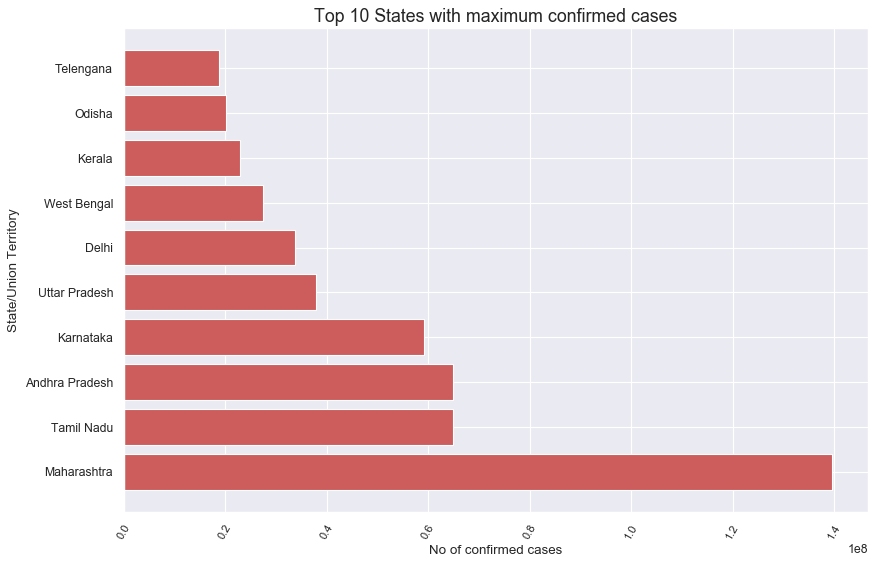

In [120]:
#plotting top 10 sates with maximum covid caeses.state against no of covid cases
covid19_top_10 = Tot_Cases.sort_values(by=['Confirmed'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.barh(covid19_top_10 ['State/Union Territory'][:10], covid19_top_10 ['Confirmed'][:10],
        align='center',color='indianred')
plt.ylabel('State/Union Territory', size = 12)
plt.xlabel('No of confirmed cases', size = 12)
plt.title('Top 10 States with maximum confirmed cases', size = 16)
plt.xticks(rotation=60,fontsize=10)

plt.show()

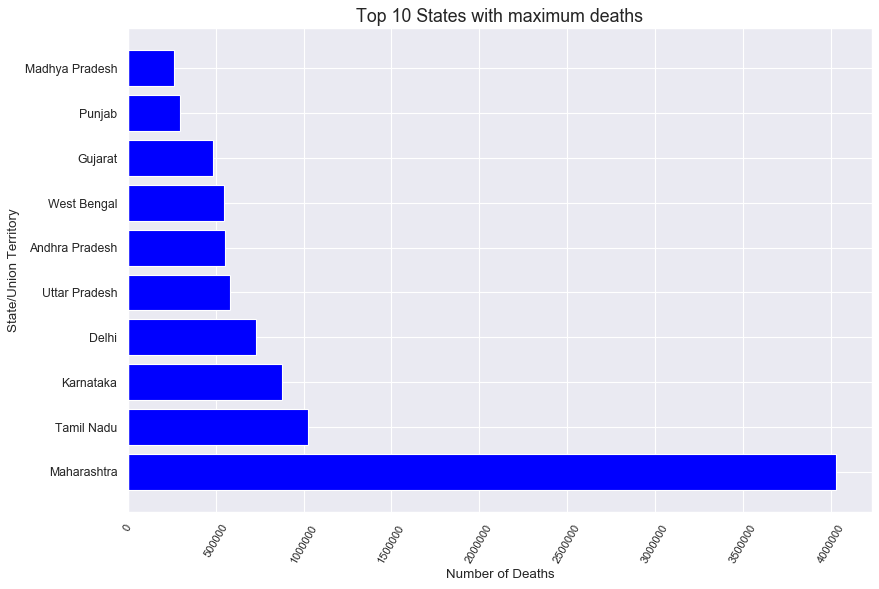

In [121]:
covid19_top_10 = Tot_Cases.sort_values(by=['Deaths'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.barh(covid19_top_10 ['State/Union Territory'][:10], covid19_top_10 ['Deaths'][:10],
        align='center',color='blue')
plt.xlabel('Number of Deaths',size=12)
plt.ylabel('State/Union Territory', size = 12)
plt.title('Top 10 States with maximum deaths', size = 16)
plt.xticks(rotation=60,fontsize=10)

plt.show()

In [122]:
Tot_Cases['mortality_rate']=(Tot_Cases['Deaths']/Tot_Cases['Confirmed']).round(2)
Tot_Cases.head()


,State/Union Territory,Confirmed,Cured,Deaths,Current Cases,mortality_rate
0,Andaman and Nicobar Islands,376093.0,327035.0,5017.0,44041.0,0.01
1,Andhra Pradesh,64911493.0,56536152.0,555228.0,7820113.0,0.01
2,Arunachal Pradesh,941675.0,734104.0,2086.0,205485.0,0.00
3,Assam,16820098.0,14137404.0,63130.0,2619564.0,0.00
4,Bihar,18536035.0,16487424.0,93293.0,1955318.0,0.01


In [123]:
states=list(Tot_Cases['State/Union Territory'])
confirmed_cases_statewise=list(Tot_Cases['Confirmed'])
Cured=list(Tot_Cases['Cured'])

In [124]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(states))
    plt.figure(figsize=(12,12))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    
    plt.legend(x, loc='center left', fontsize=10)
    plt.tight_layout()

    plt.show()

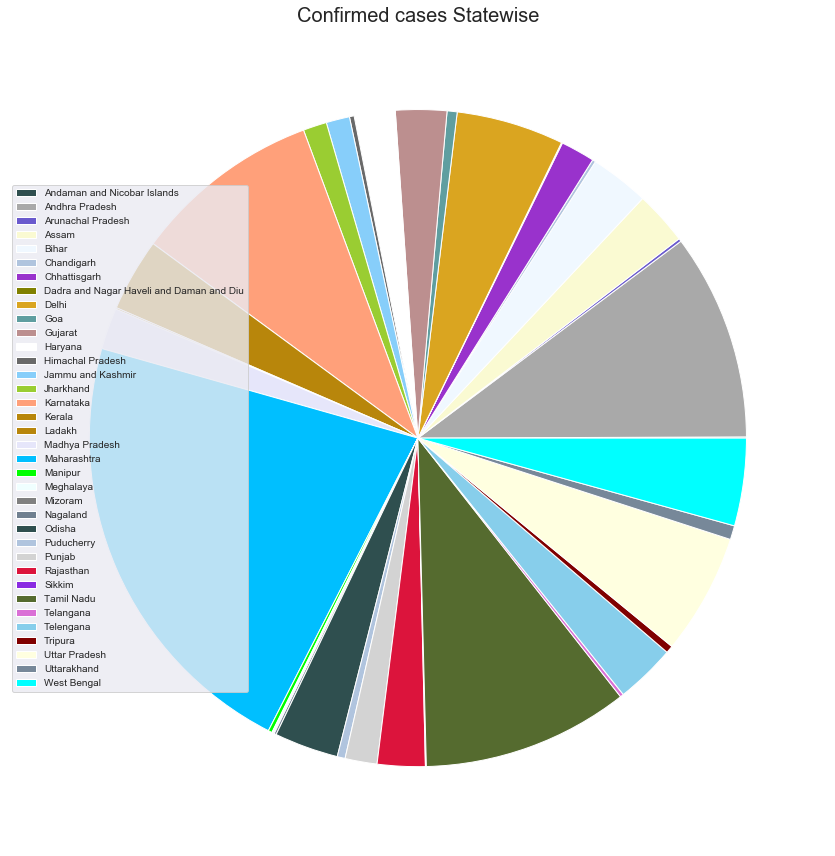

In [125]:
plot_pie_charts(states, confirmed_cases_statewise, 'Confirmed cases Statewise')


In [126]:

df['Date'] = pd.to_datetime(df['Date'])

df['Mon_Year'] = df['Date'].dt.strftime('%b-%Y')
df['Mon_Year'].unique()

array(['Jan-2020', 'Feb-2020', 'Mar-2020', 'Apr-2020', 'May-2020',
       'Jun-2020', 'Jul-2020', 'Aug-2020', 'Sep-2020', 'Oct-2020',
       'Nov-2020'], dtype=object)

In [127]:
df

,Date,Time,State/Union Territory,Cured,Deaths,Confirmed,Current Cases,Mon_Year
0,2020-01-30,18:00:00,Kerala,0.0,0.0,1.0,1.0,Jan-2020
1,2020-01-31,18:00:00,Kerala,0.0,0.0,1.0,1.0,Jan-2020
2,2020-02-01,18:00:00,Kerala,0.0,0.0,2.0,2.0,Feb-2020
3,2020-02-02,18:00:00,Kerala,0.0,0.0,3.0,3.0,Feb-2020
4,2020-02-03,18:00:00,Kerala,0.0,0.0,3.0,3.0,Feb-2020
...,...,...,...,...,...,...,...,...
8481,2020-11-16,08:00:00,Telengana,242084.0,1407.0,257876.0,14385.0,Nov-2020
8482,2020-11-16,08:00:00,Tripura,30555.0,364.0,31962.0,1043.0,Nov-2020
8483,2020-11-16,08:00:00,Uttarakhand,62543.0,1107.0,68215.0,4565.0,Nov-2020
8484,2020-11-16,08:00:00,Uttar Pradesh,480965.0,7372.0,511304.0,22967.0,Nov-2020


In [128]:
ts_df=df.groupby('Mon_Year')['Deaths','Confirmed','Cured','Current Cases'].sum()
ts_df = pd.DataFrame(ts_df)


In [129]:
new_order=['Jan-2020', 'Feb-2020','Mar-2020','Apr-2020','May-2020','Jun-2020','Jul-2020','Aug-2020','Sep-2020','Oct-2020','Nov-2020']
ts_df = ts_df.reindex(new_order, axis=0)
ts_df
 

,Deaths,Confirmed,Cured,Current Cases
Mon_Year,,,,
Jan-2020,0.0,2.0,0.0,2.0
Feb-2020,0.0,86.0,0.0,86.0
Mar-2020,202.0,9603.0,808.0,8593.0
Apr-2020,13270.0,422365.0,75443.0,333652.0
May-2020,89834.0,2900714.0,1133341.0,1677539.0
Jun-2020,319690.0,10317726.0,5668946.0,4329090.0
Jul-2020,793511.0,31659104.0,19980130.0,10885463.0
Aug-2020,1553468.0,80749620.0,58580895.0,20615257.0
Sep-2020,2443374.0,149113758.0,118592934.0,28077450.0


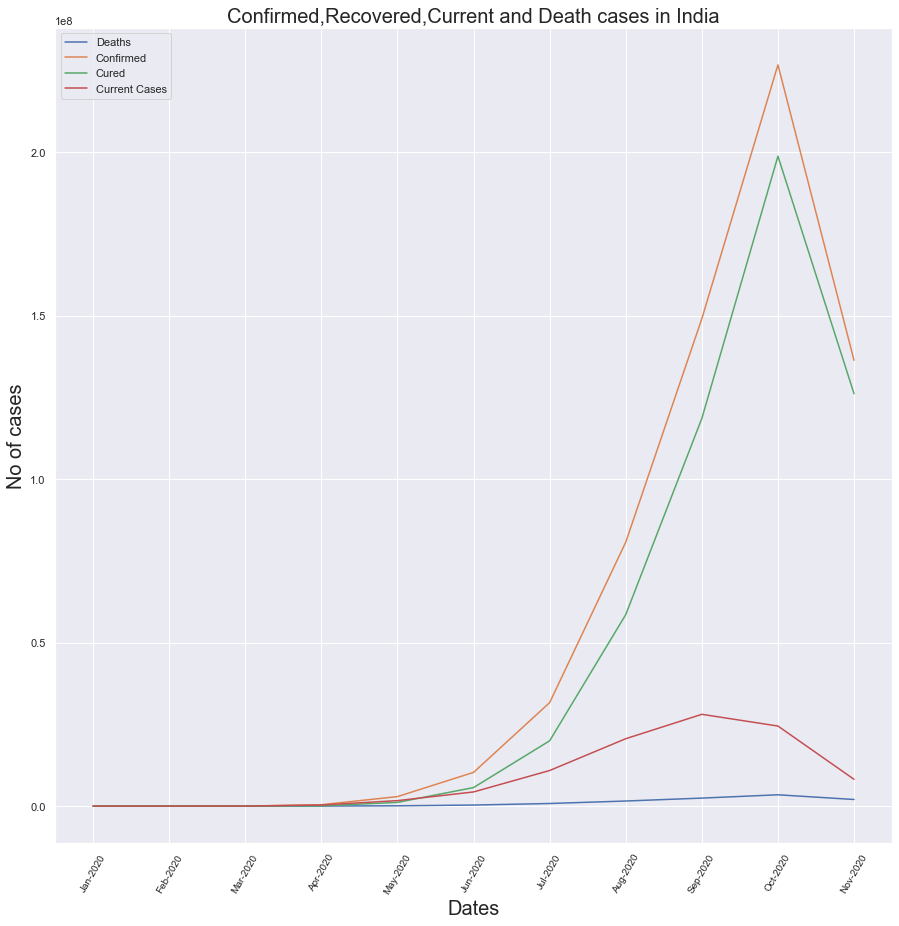

In [130]:
plt.figure(figsize=(15, 15))
plt.plot(ts_df['Deaths'],label='Deaths')
plt.plot(ts_df['Confirmed'],label='Confirmed')
plt.plot(ts_df['Cured'],label='Cured')
plt.plot(ts_df['Current Cases'],label='Current Cases')
plt.xlabel("Dates",fontsize=20)
plt.ylabel("No of cases",fontsize=20)
plt.title("Confirmed,Recovered,Current and Death cases in India",fontsize=20)

plt.xticks(rotation=60,fontsize=10)

plt.legend()

In [131]:
zones.head()

,Sl.no,State/Union Territory,Zones
0,1,Uttar Pradesh,North India
1,2,Bihar,East
2,3,Maharashtra,West India
3,4,West Bengal,East
4,5,Madhya Pradesh,Central India


In [132]:
q=pd.merge(Tot_Cases, zones, on="State/Union Territory")
q.drop(['Sl.no'],axis=1,inplace=True)
q.head()

,State/Union Territory,Confirmed,Cured,Deaths,Current Cases,mortality_rate,Zones
0,Andhra Pradesh,64911493.0,56536152.0,555228.0,7820113.0,0.01,South India
1,Arunachal Pradesh,941675.0,734104.0,2086.0,205485.0,0.00,NorthEast
2,Assam,16820098.0,14137404.0,63130.0,2619564.0,0.00,NorthEast
3,Bihar,18536035.0,16487424.0,93293.0,1955318.0,0.01,East
4,Chandigarh,1009607.0,832863.0,14459.0,162285.0,0.01,North India


In [133]:



zone_grp =q.groupby('Zones')['Confirmed','Cured','Deaths','Current Cases'].sum().astype(float)


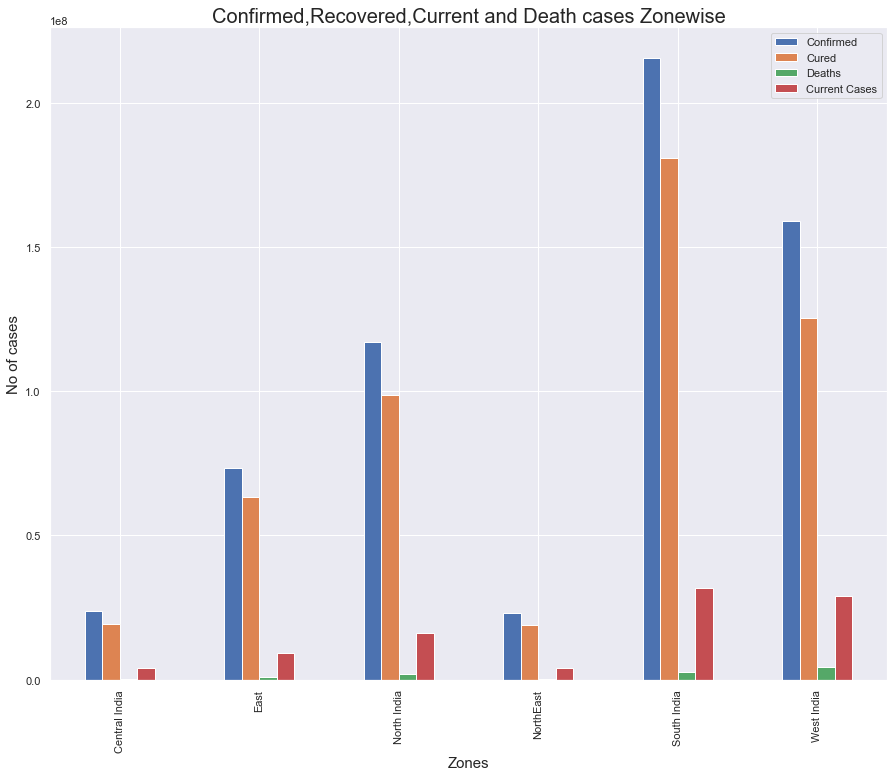

In [134]:

zone_grp[['Confirmed','Cured','Deaths','Current Cases']].plot(kind='bar',figsize=(15,12))
plt.xlabel('Zones',fontsize=15)
plt.ylabel('No of cases',fontsize=15)
plt.title('Confirmed,Recovered,Current and Death cases Zonewise',fontsize=20)

plt.show()

In [135]:
zone_grp

,Confirmed,Cured,Deaths,Current Cases
Zones,,,,
Central India,23640092.0,19129728.0,369693.0,4140671.0
East,73538810.0,63431553.0,794192.0,9313065.0
North India,116938172.0,98845860.0,2027484.0,16064828.0
NorthEast,23060826.0,18975178.0,107960.0,3977688.0
South India,215384443.0,180980351.0,2591921.0,31812171.0
West India,158858815.0,125216853.0,4557284.0,29084678.0


Text(0.5, 1.0, 'Confirmed,Recovered,Current and Death cases Zonewise')

<Figure size 432x288 with 0 Axes>

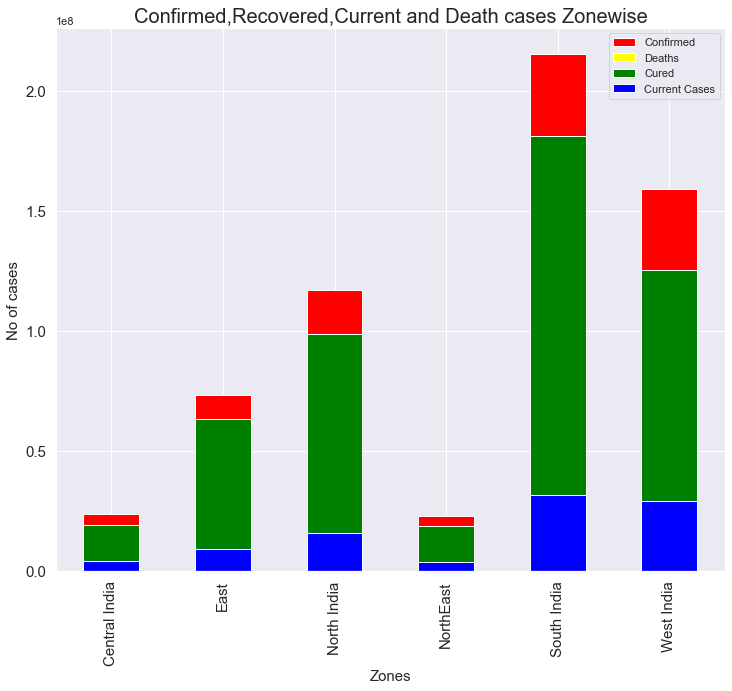

In [136]:

zone_grp=zone_grp.reset_index()
fig = plt.figure()
ax = fig.add_axes()
ax =zone_grp.plot(x="Zones", y="Confirmed", kind="bar",ax=ax,color='red',figsize=(12,10),fontsize=15,)
zone_grp.plot(x="Zones", y="Deaths", kind="bar", ax=ax, color="yellow")
zone_grp.plot(x="Zones", y="Cured", kind="bar", ax=ax, color="green")
zone_grp.plot(x="Zones", y="Current Cases", kind="bar", ax=ax, color="blue")
plt.xlabel('Zones',fontsize=15)
plt.ylabel('No of cases',fontsize=15)
plt.title('Confirmed,Recovered,Current and Death cases Zonewise',fontsize=20)

In [137]:
lastday=df.shape[0]-1

In [138]:
lastday

8422

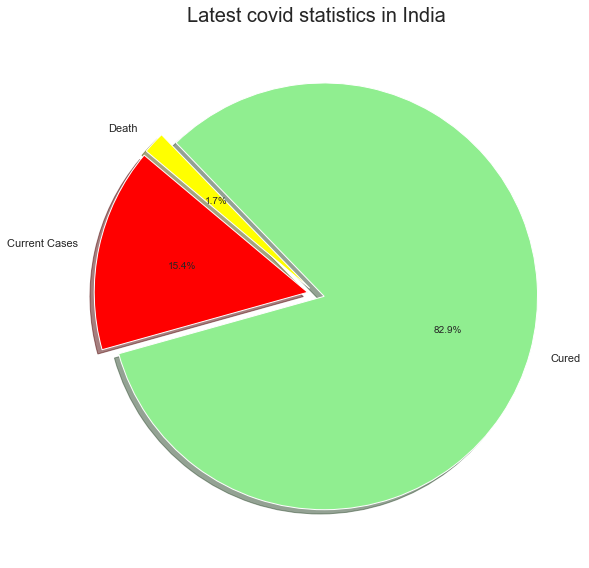

In [139]:


labels=['Current Cases','Cured','Death']
sizes=[Tot_Cases['Current Cases'].sum(),Tot_Cases['Cured'].sum(),Tot_Cases['Deaths'].sum()]
plt.figure(figsize=(10,8))
plt.pie(sizes,labels=labels, explode=(0.04,0.04,0.04),colors=['red','lightgreen','yellow'],
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Latest covid statistics in India', size=20)
    

plt.tight_layout()
plt.show()

In [140]:

population.head()


,Sl.no,State/Union Territory,Population
0,1,Uttar Pradesh,237882725.0
1,2,Bihar,124799926.0
2,3,Maharashtra,123144223.0
3,4,West Bengal,99609303.0
4,5,Madhya Pradesh,85358965.0


In [141]:
corr1=pd.merge(Tot_Cases, population, on="State/Union Territory")
corr1.drop(['Sl.no'],axis=1,inplace=True)

In [142]:

corr1['Cases/10million'] = (corr1['Confirmed']/corr1['Population'])*10000000


In [143]:
corr1

,State/Union Territory,Confirmed,Cured,Deaths,Current Cases,mortality_rate,Population,Cases/10million
0,Andhra Pradesh,64911493.0,56536152.0,555228.0,7820113.0,0.01,53903393.0,1.204219e+07
1,Arunachal Pradesh,941675.0,734104.0,2086.0,205485.0,0.00,1570458.0,5.996181e+06
2,Assam,16820098.0,14137404.0,63130.0,2619564.0,0.00,35607039.0,4.723813e+06
3,Bihar,18536035.0,16487424.0,93293.0,1955318.0,0.01,124799926.0,1.485260e+06
4,Chandigarh,1009607.0,832863.0,14459.0,162285.0,0.01,1158473.0,8.714981e+06
5,Chhattisgarh,10718422.0,8308061.0,105254.0,2305107.0,0.01,29436231.0,3.641235e+06
6,Delhi,33756114.0,29065906.0,728047.0,3962161.0,0.02,18710922.0,1.804086e+07
7,Goa,3155891.0,2668588.0,39470.0,447833.0,0.01,1586250.0,1.989529e+07
8,Gujarat,16070316.0,13271667.0,484191.0,2314458.0,0.03,63872399.0,2.516003e+06
9,Haryana,12841932.0,11049446.0,141100.0,1651386.0,0.01,28204692.0,4.553119e+06


In [144]:
corr1.corr()

,Confirmed,Cured,Deaths,Current Cases,mortality_rate,Population,Cases/10million
Confirmed,1.000000,0.998293,0.926709,0.971752,0.436018,0.557117,0.245925
Cured,0.998293,1.000000,0.908941,0.956481,0.435586,0.564878,0.249208
Deaths,0.926709,0.908941,1.000000,0.955624,0.544390,0.459944,0.229076
Current Cases,0.971752,0.956481,0.955624,1.000000,0.401598,0.508830,0.221452
mortality_rate,0.436018,0.435586,0.544390,0.401598,1.000000,0.421843,0.149492
Population,0.557117,0.564878,0.459944,0.508830,0.421843,1.000000,-0.245079
Cases/10million,0.245925,0.249208,0.229076,0.221452,0.149492,-0.245079,1.000000


(7.0, 0.0)

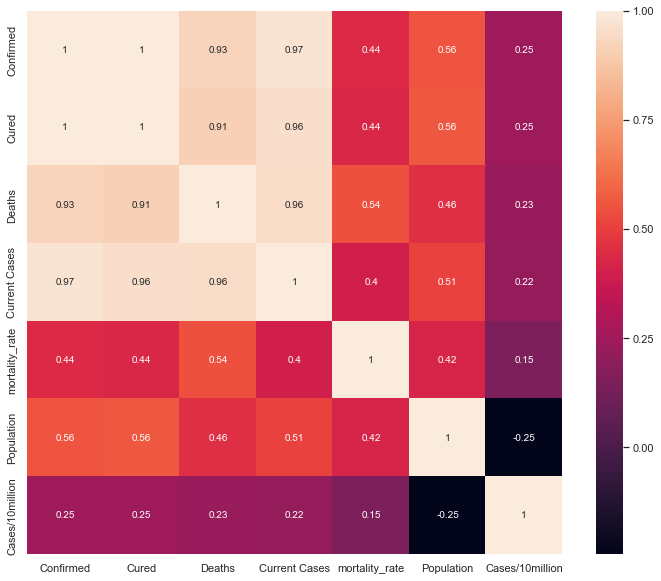

In [145]:
plt.figure(figsize = (12,10))
plt.yticks(rotation=180, va="center")
ax=sns.heatmap(corr1.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [146]:
df

,Date,Time,State/Union Territory,Cured,Deaths,Confirmed,Current Cases,Mon_Year
0,2020-01-30,18:00:00,Kerala,0.0,0.0,1.0,1.0,Jan-2020
1,2020-01-31,18:00:00,Kerala,0.0,0.0,1.0,1.0,Jan-2020
2,2020-02-01,18:00:00,Kerala,0.0,0.0,2.0,2.0,Feb-2020
3,2020-02-02,18:00:00,Kerala,0.0,0.0,3.0,3.0,Feb-2020
4,2020-02-03,18:00:00,Kerala,0.0,0.0,3.0,3.0,Feb-2020
...,...,...,...,...,...,...,...,...
8481,2020-11-16,08:00:00,Telengana,242084.0,1407.0,257876.0,14385.0,Nov-2020
8482,2020-11-16,08:00:00,Tripura,30555.0,364.0,31962.0,1043.0,Nov-2020
8483,2020-11-16,08:00:00,Uttarakhand,62543.0,1107.0,68215.0,4565.0,Nov-2020
8484,2020-11-16,08:00:00,Uttar Pradesh,480965.0,7372.0,511304.0,22967.0,Nov-2020


In [147]:
from pmdarima import auto_arima

import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt


Forecasting confirmed cases for Kerala

In [148]:
## choose data only for Kerala
state_name = 'Kerala'
state_data =df.loc[df['State/Union Territory'] == state_name]
state_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 8467
Data columns (total 8 columns):
Date                     292 non-null datetime64[ns]
Time                     292 non-null object
State/Union Territory    292 non-null object
Cured                    292 non-null float64
Deaths                   292 non-null float64
Confirmed                292 non-null float64
Current Cases            292 non-null float64
Mon_Year                 292 non-null object
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 20.5+ KB


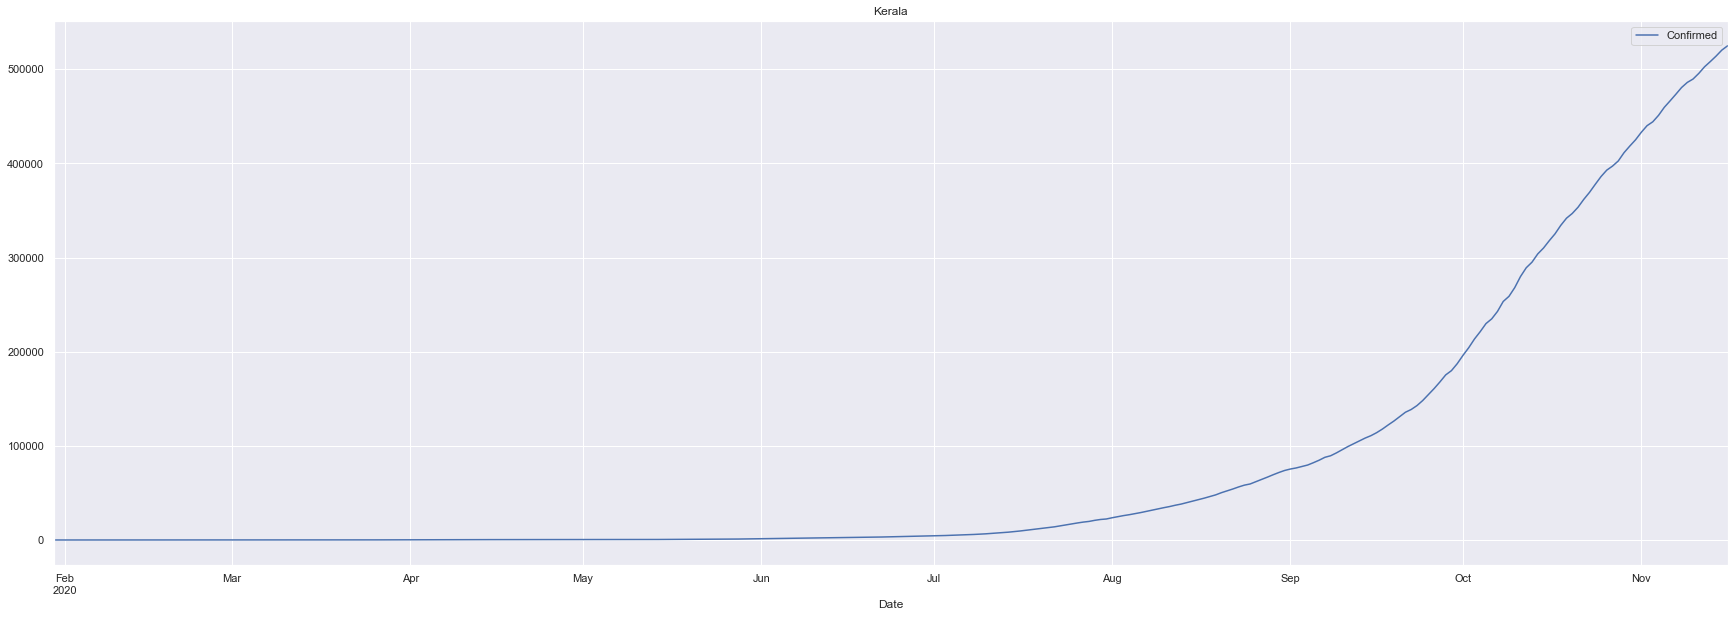

In [154]:
data = state_data[['Date','Confirmed']]
data = data[data.Confirmed != 0]


## Dates are used as index values in order to be easily understood by python as true date object
data['Date'] = pd.to_datetime(data['Date'],dayfirst = True)
data.set_index ('Date',inplace = True)
data.plot(figsize=(30,10),title = state_name)
plt.show()

In [155]:
## Check for stationarity, DF Test 
series_index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used']
sns.set()
dftest = sts.adfuller(data.Confirmed)
dfoutput = pd.Series(dftest[0:4], index=series_index)
print (dfoutput)

Test Statistic                  -0.415884
p-value                          0.907413
#Lags Used                      16.000000
Number of Observations Used    275.000000
dtype: float64


Test Statistic                  -2.731063
p-value                          0.068816
#Lags Used                      14.000000
Number of Observations Used    276.000000
dtype: float64


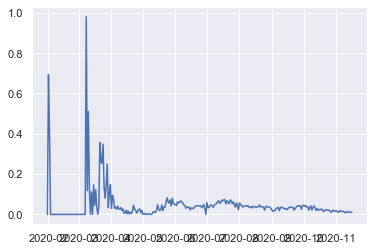

In [156]:
## converting the series to stationary by taking log transformation and differencing
#data_log = np.log(data)
data_log = np.log(data)
data_log_diff = data_log - data_log.shift(1)
data_log_diff.dropna(inplace = True)
## Check for Stationarity again
dftest = sts.adfuller(data_log_diff)
dfoutput = pd.Series(dftest[0:4], index=series_index)
print (dfoutput)
plt.plot(data_log_diff)

C:\Users\anjit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\anjit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                            Confirmed   No. Observations:                  291
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 48)   Log Likelihood                 174.072
Date:                              Sun, 20 Dec 2020   AIC                           -342.144
Time:                                      00:42:14   BIC                           -331.677
Sample:                                  01-31-2020   HQIC                          -337.927
                                       - 11-16-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L48      -0.2108      0.364     -0.579      0.563      -0.924       0.503
ma.S.L48      -0.16

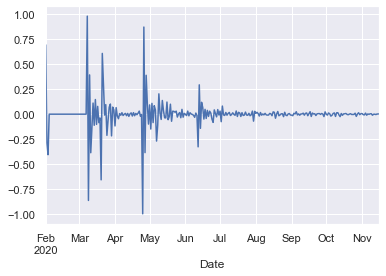

In [157]:
#seasonal arima model
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(data_log_diff["Confirmed"],order=(0,1,0), seasonal_order=(1,1,1,48))
results = model.fit()
print(results.summary())
results.resid.plot()

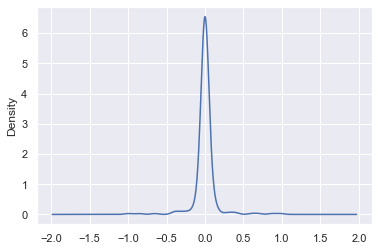

In [158]:
results.resid.plot(kind='kde')


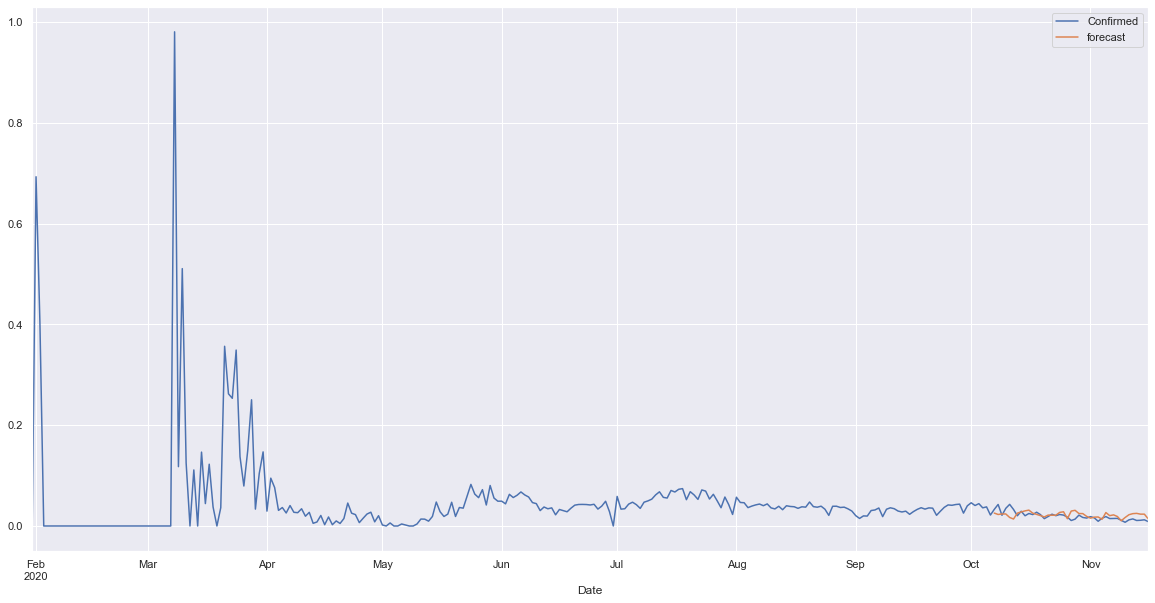

In [159]:
data_log_diff["forecast"] = results.predict(start = 250, end= 400, dynamic= True)  
data_log_diff[['Confirmed','forecast']].plot(figsize=(20,10))

C:\Users\anjit\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


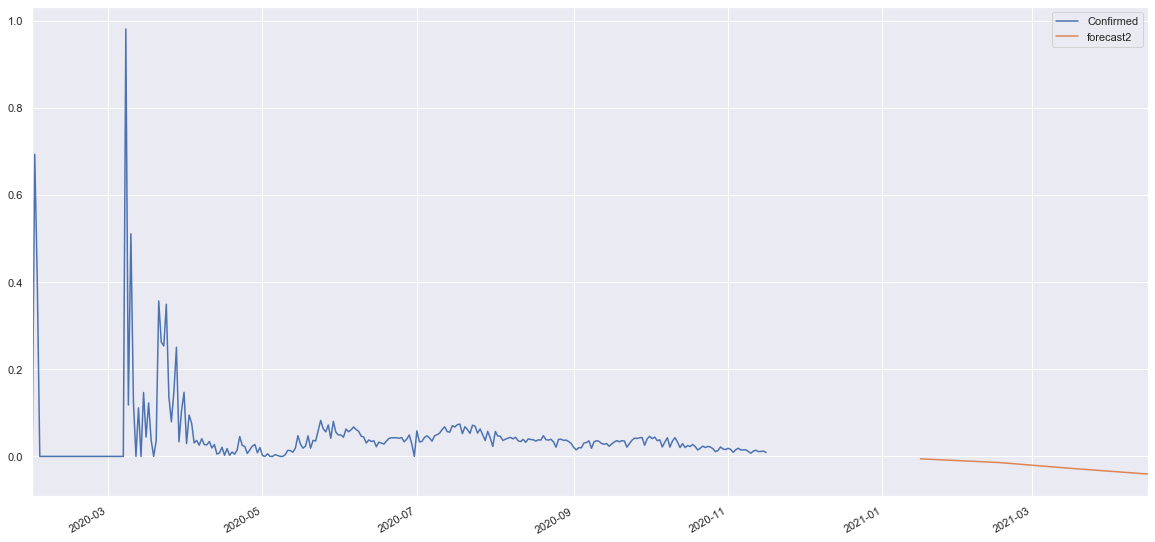

In [160]:
from pandas.tseries.offsets import DateOffset
future_dates = [data_log_diff.index[-1] + DateOffset(months=x) for x in range(0,6) ]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=data_log_diff.columns)
future_df = pd.concat([data_log_diff,future_dates_df])
future_df['forecast2'] = results.predict(start = 348, end = 540, dynamic= True)  
future_df[['Confirmed', 'forecast2']].plot(figsize=(20, 10)) 